In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os



In [3]:
# --- 1. Load Data ---
try:
    trader_df = pd.read_csv('historical_data.csv')
    sentiment_df = pd.read_csv('fear_greed_index.csv')
    print("Files loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    print("Please ensure 'historical_data.csv' and 'fear_greed_index.csv' are uploaded to the Colab session.")



Files loaded successfully.


In [4]:
# --- 2. Data Preprocessing and Cleaning ---

# Convert the 'Timestamp' column (UNIX milliseconds) to datetime objects
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], unit='ms')
# Extract the date part for merging
trader_df['date'] = trader_df['Timestamp'].dt.date

# Sentiment Data Preprocessing
sentiment_df.rename(columns={'classification': 'sentiment'}, inplace=True)

# Convert the 'date' string column to date objects for a robust merge
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date



In [5]:
# --- 3. Merge Datasets ---
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')
print("\nDatasets merged successfully.")
print(f"Merged DataFrame shape: {merged_df.shape}")




Datasets merged successfully.
Merged DataFrame shape: (184263, 20)


In [6]:
# --- 4. Feature Engineering & Analysis ---

# Calculate trade volume in USD using the correct column names
merged_df['volume_usd'] = merged_df['Execution Price'] * merged_df['Size Tokens']

# Use the correct 'Closed PnL' column for profitability analysis
# We will group all trades by sentiment for our analysis
sentiment_groups = merged_df.groupby('sentiment')

# a) Profitability Analysis
pnl_analysis = sentiment_groups['Closed PnL'].agg(['mean', 'sum', 'std']).reset_index()
print("\n--- Profitability Analysis (PnL) by Sentiment ---")
print(pnl_analysis)

# b) Volume Analysis
volume_analysis = sentiment_groups['volume_usd'].agg(['mean', 'sum', 'count']).reset_index()
print("\n--- Volume Analysis by Sentiment ---")
print(volume_analysis)




--- Profitability Analysis (PnL) by Sentiment ---
       sentiment       mean           sum          std
0  Extreme Greed  25.418772  1.769655e+05   306.166937
1           Fear  50.047622  6.699925e+06   909.121796
2          Greed  87.894859  3.189617e+06  1148.343968
3        Neutral  22.229713  1.587424e+05   633.704815

--- Volume Analysis by Sentiment ---
       sentiment         mean           sum   count
0  Extreme Greed  5660.265796  3.940677e+07    6962
1           Fear  5259.977829  7.041585e+08  133871
2          Greed  3182.883847  1.155037e+08   36289
3        Neutral  3058.848085  2.184323e+07    7141


/tmp/ipython-input-1981088674.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pnl_analysis, x='sentiment', y='sum', palette=['#C70039', '#33C700'])
/tmp/ipython-input-1981088674.py:11: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=pnl_analysis, x='sentiment', y='sum', palette=['#C70039', '#33C700'])
/tmp/ipython-input-1981088674.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volume_analysis, x='sentiment', y='sum', palette=['#C70039', '#33C700'])
/tmp/ipython-input-1981088674.py:22: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which


Saved total_pnl_by_sentiment.png
Saved volume_by_sentiment.png

Analysis complete. Visualizations saved to the 'outputs/' directory.


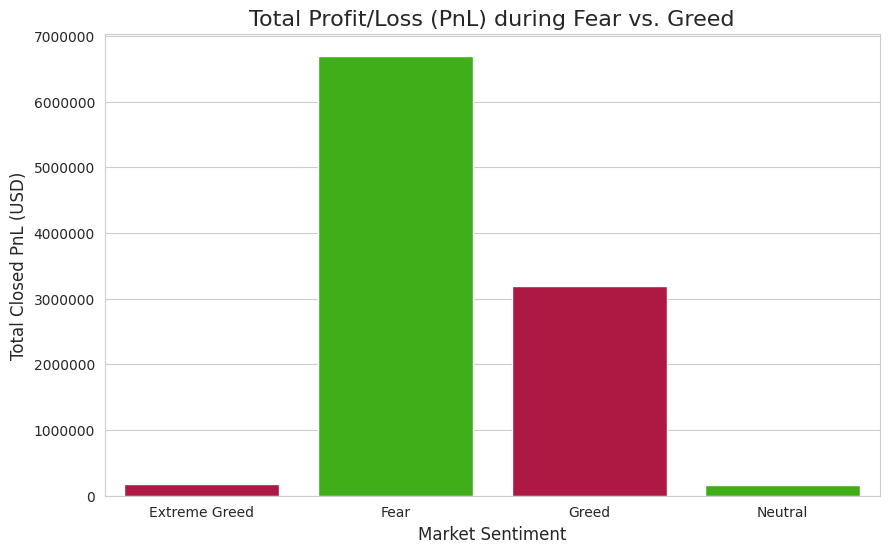

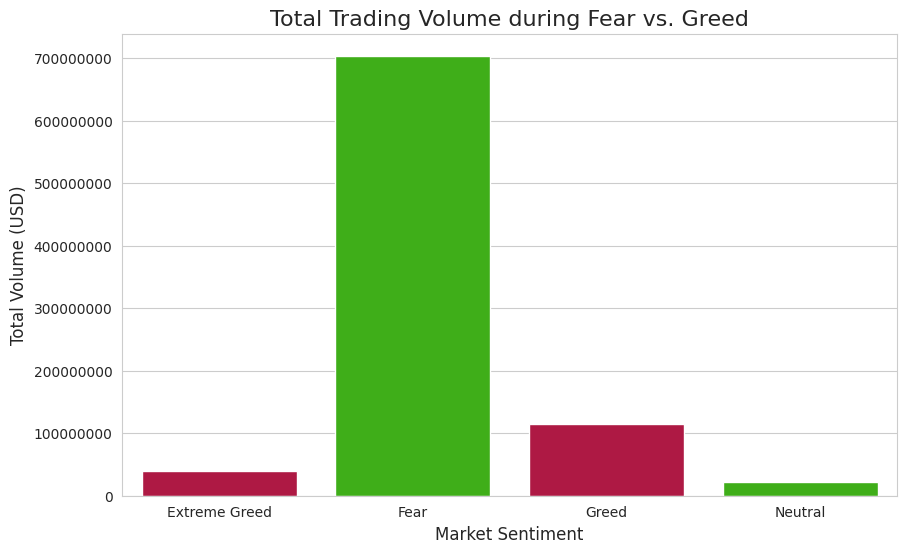

In [7]:
# --- 5. Visualization ---
# Ensure the outputs directory exists for saving plots
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Set plot style
sns.set_style("whitegrid")

# a) Profitability Visualization (Total PnL)
plt.figure(figsize=(10, 6))
sns.barplot(data=pnl_analysis, x='sentiment', y='sum', palette=['#C70039', '#33C700'])
plt.title('Total Profit/Loss (PnL) during Fear vs. Greed', fontsize=16)
plt.ylabel('Total Closed PnL (USD)', fontsize=12)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('outputs/total_pnl_by_sentiment.png')
print("\nSaved total_pnl_by_sentiment.png")


# b) Trade Volume Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=volume_analysis, x='sentiment', y='sum', palette=['#C70039', '#33C700'])
plt.title('Total Trading Volume during Fear vs. Greed', fontsize=16)
plt.ylabel('Total Volume (USD)', fontsize=12)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('outputs/volume_by_sentiment.png')
print("Saved volume_by_sentiment.png")

print("\nAnalysis complete. Visualizations saved to the 'outputs/' directory.")